# TARUN SUNKARANENI'S Point-Clustering Notebook: Gonzales Algorithm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from scipy.spatial import distance
import seaborn as sns
import matplotlib as mpl
import math
%matplotlib inline
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 200

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['C2.csv', '.DS_Store']


In [2]:
c2 = pd.read_csv("../input/C2.csv", names=['x0', 'x1'])

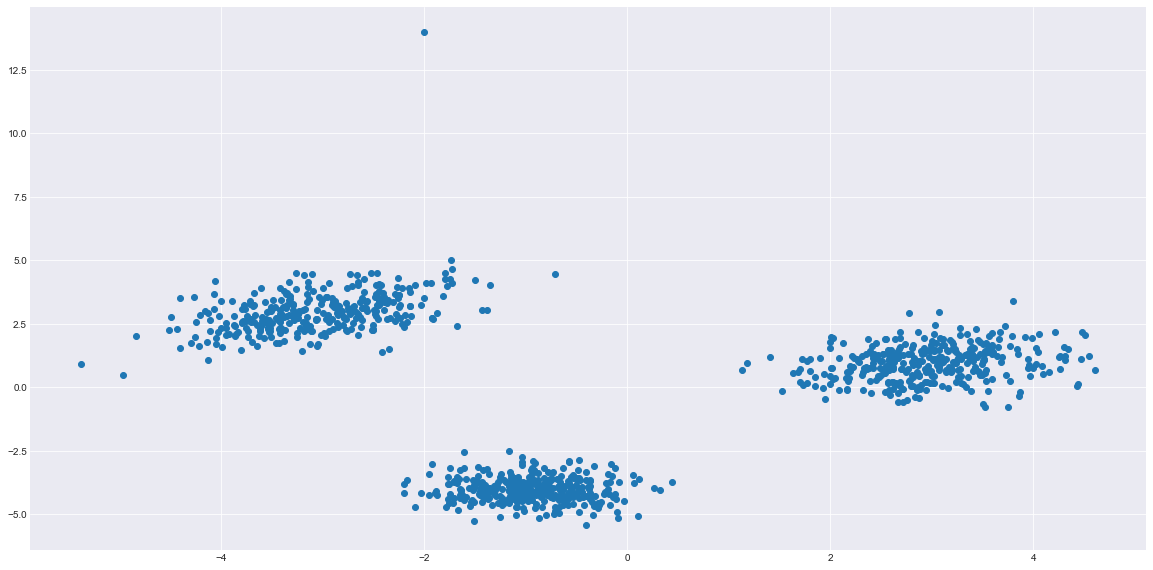

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(c2['x0'],c2['x1'])

In [7]:
data_set = []
for index, row in c2.iterrows():
        data_set.append([row['x0'], row['x1']]) 
data_set = np.array(data_set)
        # prelim work to get every point into a list of coordinates

## The Gonzalez algorithm always picks the point in $x$ that is furthest from the current set of centers, and lets it also be a center.

In [8]:
def gonzalez(data, cluster_num, technique = 'max'):
    clusters = []
    clusters.append(data[0]) # let us assign the first cluster point to be first point of the data
    while len(clusters) is not cluster_num:
        if technique is 'max':
            clusters.append(max_dist(data, clusters)) 
        if technique is 'norm':
            clusters.append(norm_dist(data, clusters)) 
        # we add the furthest point from ALL current clusters
    return (clusters)

In [9]:
def max_dist(data, clusters):
    distances = np.zeros(len(data)) # we will keep a cumulative distance measure for all points
    for cluster_id, cluster in enumerate(clusters):
        for point_id, point in enumerate(data):
            if distance.euclidean(point,cluster) == 0.0:
                distances[point_id] = -math.inf # this point is already a cluster (obselete)
            if not math.isinf(distances[point_id]):
                # if a point is not obselete, then we add the distance to its specific bin
                distances[point_id] = distances[point_id] + distance.euclidean(point,cluster) 
                # return the point which is furthest away from all the other clusters
    return data[np.argmax(distances)]

In [10]:
cluster_points = gonzalez(data_set, 3)
print('Cluster Centeroids:', cluster_points)

Cluster Centeroids: [array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696])]


> ### Using $3$-*center* cost $\max_{x \in X} \textbf{d}(x,\phi_C(x))$

In [11]:
cluster_distance = np.full(len(data_set), np.inf)
for point_idx, point in enumerate(data_set):
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if cluster_distance[point_idx] is math.inf:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            continue
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
print('3-center cost:', np.max(cluster_distance))

3-center cost: 7.642243792918873


### Using $3$-*means* cost $\sqrt{\frac{1}{|X|}\sum_{x \in X} (\textbf{d}(x,\phi_C(x)))^2}$

In [15]:
cost = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
print('3-means cost:', cost)

3-means cost: 3.699331676810883


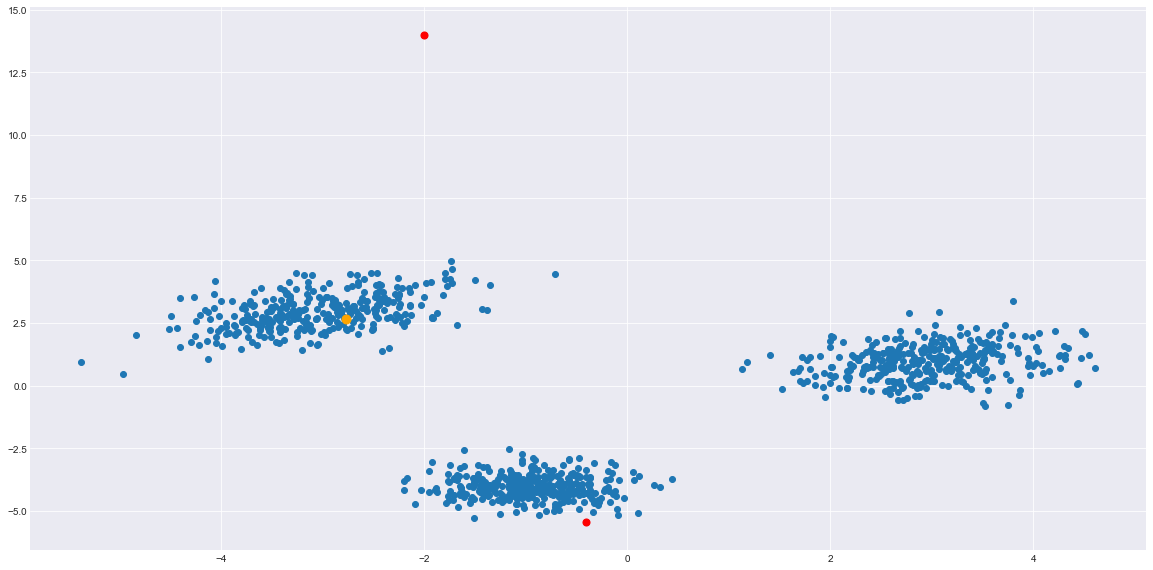

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='o', c='red', s=50)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='o', c='orange', s=80)

# ----------_Experimental_----------

In [20]:
cluster_points = gonzalez(data_set, 4)

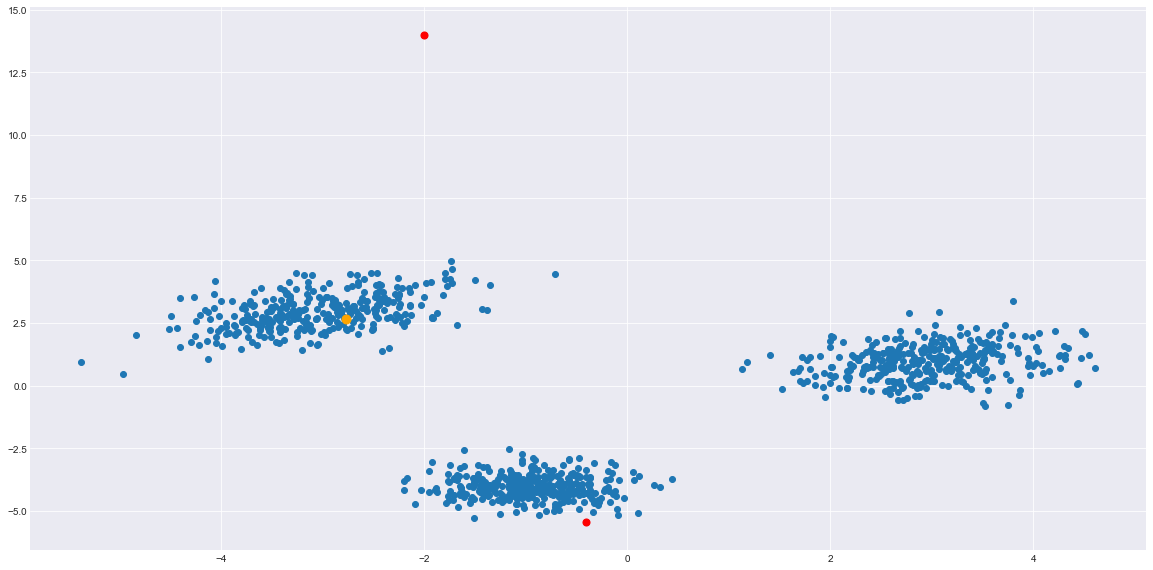

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='o', c='red', s=50)
    if index is 0: # this is our first point, which was picked staticly
        plt.scatter(point[0],point[1], marker='o', c='orange', s=80)

### Assigning new cluster to  $\max_{x \in X} \sqrt{\frac{1}{|X|}\sum_{x \in X} (\textbf{d}(x,\phi_C(x)))^2}$

In [25]:
def norm_dist(data, clusters):
    distances = np.zeros(len(data)) # we will keep a cumulative distance measure for all points
    for point_id, point in enumerate(data):
        for cluster_id, cluster in enumerate(clusters):
            if distance.euclidean(point,cluster) == 0.0:
                distances[point_id] = -math.inf # this point is already a cluster (obselete)
            if not math.isinf(distances[point_id]):
                # if a point is not obselete, then we add the distance to its specific bin
                distances[point_id] = distances[point_id] + math.pow(distance.euclidean(point,cluster),2) 
                # return the point which is furthest away from all the other clusters
    for distance_id, current_distance in enumerate(distances):
        if not math.isinf(current_distance): 
            distances[distance_id] = math.sqrt(current_distance/len(data))
    return data[np.argmax(distances)]

In [26]:
cluster_points = gonzalez(data_set, 3,'norm')
print('Cluster Centeroids:', cluster_points)

Cluster Centeroids: [array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696])]


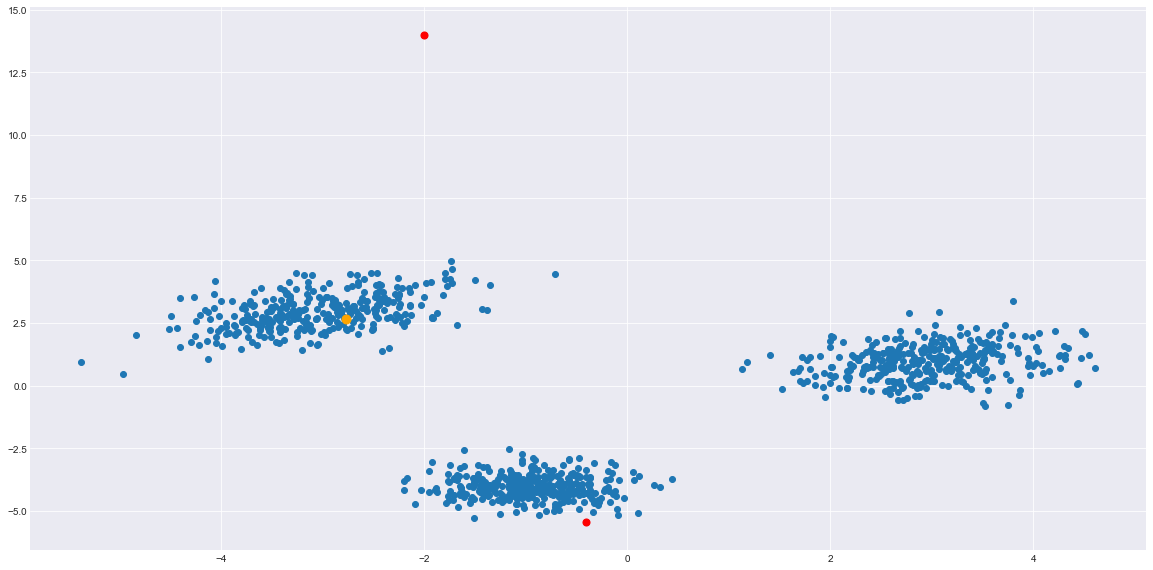

In [37]:
plt.figure(figsize=(20,10))
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='o', c='red', s=50)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='o', c='orange', s=80)